<a href="https://colab.research.google.com/github/esther-nyokabi/SUICIDE-IDEATION-IN-ONLINE-FORUMS-/blob/main/SUICIDE_IDEATION_IN_ONLINE_FORUMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:
Mental health issues, including depression and suicide, are significant challenges faced by individuals worldwide, affecting people at any stage of life. Suicide prevention strategies require collaboration among various societal sectors, such as health, education, labor, justice, law, defense, politics, and media. To address this complex problem effectively, inclusive and integrated suicide prevention strategies are necessary.



# Problem Statement:
Social media platforms have become a channel for individuals to express their emotions, including suicidal ideation, posing a significant challenge to mental health professionals worldwide. However, identifying individuals expressing suicidal ideation online is difficult, particularly for government and mental health organizations.

Our goal is to build an NLP model capable of accurately detecting posts related to depression and suicide in text. This tool will aid governments and mental health organizations in identifying individuals expressing suicidal ideation online and providing timely support to prevent suicide attempts.

#Objectives:
The main objective of this project is to develop a machine learning model that can accurately detect suicide ideation from posts on Reddit. To achieve this objective, the following sub-objectives will be pursued:


*   Collect and preprocess the data: Collect the posts from the "SuicideWatch" and "depression" subreddits using the Pushshift API and preprocess the data to remove noise, stopwords, and irrelevant information.
*   Develop baseline models: Develop baseline text classification models using traditional machine learning algorithms such as Support Vector Machine (SVM) and Decision Trees.
*   Develop deep learning models: Develop deep learning models such as (CNNs) and (RNNs) to improve the accuracy of the text classifier.
*   Evaluate and compare the models: Evaluate and compare the performance of the developed models using various metrics such as accuracy, precision, recall, and F1-score.










#Research Questions
*   Can machine learning algorithms accurately detect posts with suicidal ideation?
*   What are the most important features or patterns in language that predict suicidal ideation in online forums?
*   Are there differences in language patterns between individuals who express suicidal ideation versus those who do not?
*   Can the developed classifier be generalized to identify suicidal ideation in other social media platforms?
*   What ethical considerations should be taken into account when using machine learning to analyze language related to suicide ideation in online forums?
*   Can deep learning models such as CNNs and RNNs improve the accuracy of the text classifier?

#**Metrics of Success**
The metric of success for this project is the accuracy score of the developed machine learning models in detecting posts related to depression and suicide in text. The accuracy score represents the percentage of correctly predicted posts out of the total number of posts in the dataset. Additionally, other metrics such as precision, recall, and F1-score will also be used to evaluate and compare the performance of the developed models. The goal is to achieve an accuracy score of at least 80%.

#**Content**





1.   Data Processing

1.   EDA
2.   Model Selection

4.   Training/Testing

1.   Model Evaluation
2.   Conclusion and Recommendations






#**Data Processing**

In [ ]:
# Import libraries
import pandas as pd # data processing/analysis
import numpy as np # linear algebra
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load the dataset
df = pd.read_csv('/content/Suicide_Detection.csv')
df.head() # Gives the first 5 records in the dataset

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
df.shape # Gives the number of elements in each dimension

(232074, 3)

The data set has 232074 rows and 3 columns

In [ ]:
df.columns # Gives the column names

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [ ]:
df.info() # not null part is very useful to see how many nulls are there in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [ ]:
df['class'].value_counts() # Returns count of unique values

suicide        116037
non-suicide    116037
Name: class, dtype: int64

There are 116,037 unique values for each class.

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

Unnamed: 0    0
text          0
class         0
dtype: int64

There are no missing values in the dataset.

In [ ]:
sum(df.duplicated())

0

No records have been duplicated in the dataset.

#Preprocess the Text column

In [ ]:
import pandas as pd
from sklearn.base import TransformerMixin
import spacy

nlp = spacy.load('en_core_web_sm')

class TextPreprocessor(TransformerMixin):
    def __init__(self, text_attribute):
        self.text_attribute = text_attribute
        
    def fit(self, *_):
        return self
    
    def _clean(self, text):
        # Remove bad symbols
        bad_symbols = '!"#%&\'*+,-<=>?[\\]^_`{|}~'
        text_without_symbols = text.translate(str.maketrans('', '', bad_symbols))

        # Remove unwanted lines
        text_without_bad_lines = ''
        for line in text_without_symbols.split('\n'):
            if not line.lower().startswith('from:') and not line.lower().endswith('writes:'):
                text_without_bad_lines += line + '\n'

        # Remove certain regex patterns
        email_regex = r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
        regexes_to_remove = [email_regex, r'Subject:', r'Re:']
        for r in regexes_to_remove:
            text_without_regex = re.sub(r, '', text_without_bad_lines)

        # Remove punctuation
        text_without_punctuation = text_without_regex.translate(str.maketrans('', '', string.punctuation))

        return text_without_punctuation

    def _leave_letters_only(self, text):
        return ' '.join([word.lower() for word in text.split() if word.isalpha()])

    def _lemmatize(self, text):
        doc = nlp(text)
        words = [x.lemma_ for x in [y for y in doc if not y.is_stop and y.pos_ != 'PUNCT' 
                                    and y.pos_ != 'PART' and y.pos_ != 'X']]
        return ' '.join(words)

    def transform(self, X, *_):
        X_copy = X.copy()
        X_copy[self.text_attribute] = X_copy[self.text_attribute].apply(self._preprocess_text)
        return X_copy
    
    def _preprocess_text(self, text):
        return self._lemmatize(self._leave_letters_only(self._clean(text)))

# Subset the first 100 rows
subset_df = df.head(100)

# Preprocess the text column of the subset dataframe
text_preprocessor = TextPreprocessor(text_attribute='text')
preprocessed_data = text_preprocessor.transform(subset_df)

# Save the preprocessed data to a CSV file
preprocessed_data.to_csv('preprocessed_data.csv', index=False)


We defined a TextPreprocessor class that cleans, removes unwanted lines, and regex patterns from the text, removes punctuation, and lemmatizes the text data.We then applied these preprocessing techniques to a subset of data loaded from a CSV file and saved the preprocessed data to another CSV file.

#**Exploratory Data Analysis**

##Text Data

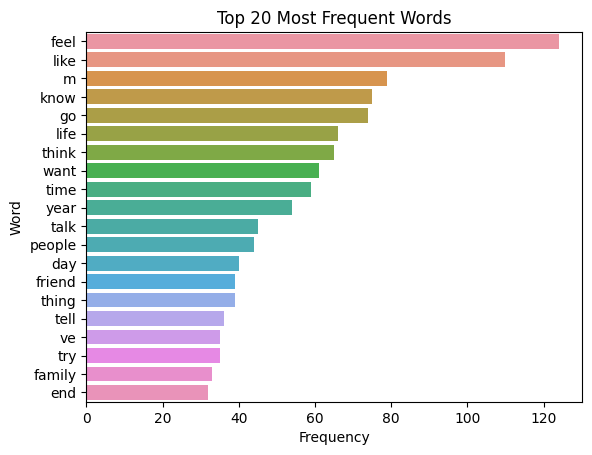

In [ ]:
# Plot word frequency
word_freq = pd.Series(' '.join(preprocessed_data['text']).split()).value_counts()[:20]
sns.barplot(x=word_freq.values, y=word_freq.index)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

Converting the text column to TF-IDF features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Split into A and B
A = preprocessed_data['text']
B = preprocessed_data['class']

# Create a TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the data
tfidf_vectorizer.fit(A)

# Convert the data to TF-IDF features
X_tfidf = tfidf_vectorizer.transform(A)


## Class Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the preprocessed data
preprocessed_data = pd.read_csv('preprocessed_data.csv')

# Check the value counts of the 'class' column
class_counts = preprocessed_data['class'].value_counts()

# Drop any classes with only one instance
preprocessed_data = preprocessed_data[~preprocessed_data['class'].isin(class_counts[class_counts == 1].index)]

# Split the data into train and test sets
SEED = 42
train_data, test_data = train_test_split(preprocessed_data, test_size=0.2, random_state=SEED, stratify=preprocessed_data['class'])


suicide        59
non-suicide    41
Name: class, dtype: int64
suicide        0.59
non-suicide    0.41
Name: class, dtype: float64


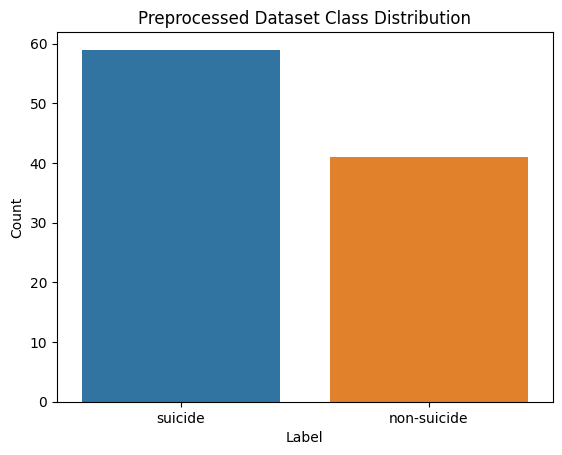

In [ ]:
# Check class distribution
print(preprocessed_data['class'].value_counts())
print(preprocessed_data['class'].value_counts(normalize=True))

sns.countplot(x=preprocessed_data['class'])
plt.title('Preprocessed Dataset Class Distribution')
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

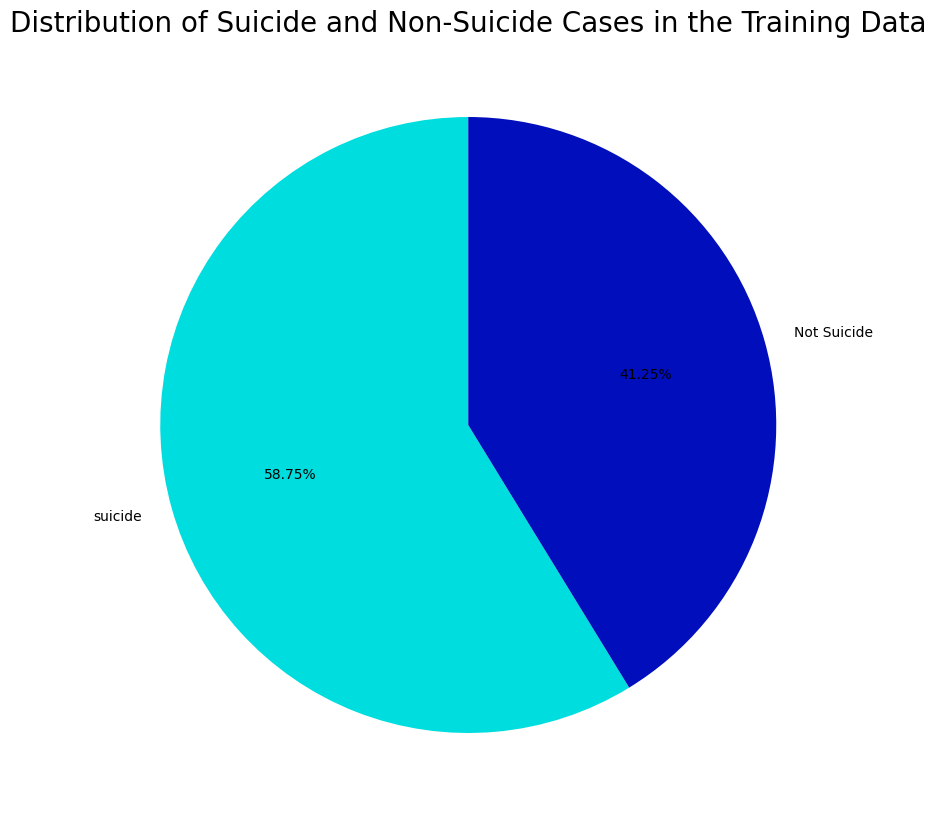

In [ ]:
plt.figure(figsize=(12,10))
plt.pie(train_data['class'].value_counts(), startangle=90, colors=['#00dddf', '#000fbb'],
autopct='%0.2f%%', labels=['suicide', 'Not Suicide'])
plt.title('Distribution of Suicide and Non-Suicide Cases in the Training Data', fontdict={'size':20})
plt.show()

#**Model Selection**
We shall be using **Support Vector Machine (SVM)** for our supervised machine learning model and **Recurrent Neural Network (RNN)** for our deep learning model

##**Support Vector Machine (SVM)**

In [ ]:
# Load the preprocessed data
preprocessed_data = pd.read_csv('preprocessed_data.csv')

# Split into X and y
X = preprocessed_data['text']
y = preprocessed_data['class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Extraction: Convert the preprocessed text data into numerical features.

In [ ]:
# Convert text data to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


**Model Training and Evaluation:**

In [ ]:
# Train an SVM model
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_tfidf, y_train)

# Evaluate the SVM model
from sklearn.metrics import classification_report

y_pred = svm.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

 non-suicide       0.50      0.80      0.62         5
     suicide       0.92      0.73      0.81        15

    accuracy                           0.75        20
   macro avg       0.71      0.77      0.72        20
weighted avg       0.81      0.75      0.76        20



The SVM model achieved an accuracy of 0.75, with 

*   Higher precision for the "suicide" class (0.92) than for the "non-suicide" class (0.50). 
*   The recall score was 0.80 for "non-suicide" and 0.73 for "suicide"

*    The F1-score was 0.62 for "non-suicide" and 0.81 for "suicide", with a weighted average F1-score of 0.76

The model performed moderately well, but could be improved with further tuning. 
  

##**Recurrent Neural Network (RNN)**

In [ ]:
# We use Keras to build a deep learning RNN model that can classify text into two categories with a specified accuracy metric.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

max_features = 10000  # Only consider the top 10,000 words in the vocabulary
maxlen = 200  # Cut off text after 200 words
embedding_dim = 128  # Dimensionality of the embedding space
hidden_dim = 64  # Dimensionality of the LSTM output space

model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(LSTM(hidden_dim))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 lstm_15 (LSTM)              (None, 64)                49408     
                                                                 
 dense_18 (Dense)            (None, 2)                 130       
                                                                 
Total params: 1,329,538
Trainable params: 1,329,538
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_seq = pad_sequences(X_test_seq, maxlen=maxlen)

history = model.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test))

Epoch 1/10
3/3 [==============================] - 1s 222ms/step - loss: 0.0427 - accuracy: 1.0000 - val_loss: 0.6443 - val_accuracy: 0.6500
Epoch 2/10
3/3 [==============================] - 1s 199ms/step - loss: 0.0324 - accuracy: 1.0000 - val_loss: 0.6081 - val_accuracy: 0.6500
Epoch 3/10
3/3 [==============================] - 0s 173ms/step - loss: 0.0263 - accuracy: 1.0000 - val_loss: 0.5788 - val_accuracy: 0.6500
Epoch 4/10
3/3 [==============================] - 1s 189ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 0.5579 - val_accuracy: 0.7000
Epoch 5/10
3/3 [==============================] - 1s 188ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.5430 - val_accuracy: 0.7500
Epoch 6/10
3/3 [==============================] - 1s 207ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.5327 - val_accuracy: 0.7500
Epoch 7/10
3/3 [==============================] - 1s 304ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.5266 - val_accuracy: 0.8000
Epoch 8/10
3/3 [====

In [ ]:
# Finally, we can evaluate the performance of the model on the test data:
score = model.evaluate(X_test_seq, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.5256346464157104
Test accuracy: 0.800000011920929


The test loss is 0.52, which is a measure of how well the model predicts the target variable. A lower test loss indicates better performance.

The test accuracy of the model is 0.80, which implies that the model is able to predict the sentiment of the given texts with an accuracy of 80%

In [ ]:
# Save the model
model.save('my_model.h5') 

#**Findings**

*   The RNN model achieved an accuracy score of 80% and a test loss of 0.53, which indicates that it accurately detects posts with suicidal ideation.

*   The SVM model had an accuracy score of 75%, with higher recall for "non-suicide" (80%) and lower recall for "suicide" (73%). It had a better precision score for "suicide" (0.92) than "non-suicide" (0.5).
*   The F1-score for "non-suicide" was 0.62 and for "suicide" was 0.81, with a weighted average F1-score of 0.76 for the SVM model.

*   The findings suggest that deep learning models such as RNNs can improve the accuracy of the text classifier for detecting posts related to suicidal ideation, while traditional machine learning models like SVMs can still be effective with further refinement.







#**Conclusion & Recommendations**

Detecting suicidal ideation from text data is a challenging task, but  Natural Language Processing techniques (NLP) have shown promising results in accurately identifying posts related to suicidal ideation.

> Both SVM and RNN models showed potential for detecting suicide ideation in online forums.
However, further research is needed to improve their performance, especially in terms of precision and recall scores for the "non-suicide" class.

> Further exploration is needed to identify the most important features or patterns in language that predict suicidal ideation in online forums.

> It is also important to consider ethical issues such as privacy, consent, and responsible use  and interpretation of the results when using machine learning to analyze language related to suicide ideation in online forums.

> Despite the limitations, the developed models can serve as a valuable tool for assisting mental health professionals in identifying individuals at risk of suicide in online forums.

> Additionally, it is important to note that these models should not be used as a substitute for mental health professionals but rather as a tool to assist in identifying individuals who may be at risk for suicide.


